In [1]:
from sklearn.preprocessing import LabelEncoder

In [2]:
%matplotlib inline

In [3]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

/tmp/ipykernel_19617/1054018543.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [9]:
def getRxPacketFile(eNBArray, UEArray, basefolder = ''):

    filename = 'average_SINR.txt'
    if os.path.isfile(filename):
        with open(filename, "r") as rxpacketfile:
            return pd.read_csv(rxpacketfile, sep='\t', \
                               names=['mode', 'time', 'frame', 'subF', '1stSym', \
                                   'symbol#', 'cellId', 'rnti', 'ccId', 'tbSize', 'mcs', 'rv', \
                                   'SINR(dB)', 'corrupt', 'TBler'], \
                               dtype={'mode': str}, \
                               index_col=1,
                               low_memory=False,
                               #skiprows=0,
                               #header=0,
                               verbose=True,
                               
                              )
    else:
        return None
    

In [10]:
def getTcpWindowFile(basefolder = ''):
    filename = 'mmWave-tcp-window-newreno-normal.txt'
    if os.path.isfile(filename):
        with open(filename, "r") as file:
            return pd.read_csv(file, sep='\t', \
                               names=['time', 'old_CWND', 'new_CWND'],
                               index_col=0,
                               low_memory=False,
                               #skiprows=0,
                               #header=0,
                               verbose=True,
                              )
    else:
        return None

In [11]:
def getTcpRTTFile(basefolder = ''):

    filename = 'mmWave-tcp-rtt-newreno-normal.txt'
    if os.path.isfile(filename):
        with open(filename, "r") as file:
            return pd.read_csv(file, sep='\t', \
                               names=['time', 'old_RTT', 'new_RTT'],
                               index_col=0,
                               low_memory=False,
                               #skiprows=0,
                               #header=0,
                               verbose=True,
                              )
    else:
        return None
    


In [12]:
def getTcpDataFile(basefolder = ''):
    filename = 'mmWave-tcp-data-newreno-normal.txt'
    if os.path.isfile(filename):
        with open(filename, "r") as file:
            return pd.read_csv(file, sep='\t', \
                               names=['time', 'PKG_SIZE'],
                               index_col=0,
                               low_memory=False,
                               #skiprows=0,
                               #header=0,
                               verbose=True,
                              )
    else:
        return None
    

        

In [13]:
eNBs = []
UEs = []

rxDF_scenario = getRxPacketFile(eNBs,UEs)
cwndDF_scenario = getTcpWindowFile()
rttDF_scenario = getTcpRTTFile()
dataDF_scenario = getTcpDataFile()

/tmp/ipykernel_19617/598467818.py:6: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(rxpacketfile, sep='\t', \


Tokenization took: 69.76 ms
Type conversion took: 134.94 ms
Parser memory cleanup took: 2.28 ms


/tmp/ipykernel_19617/3772653710.py:5: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(file, sep='\t', \
/tmp/ipykernel_19617/2786709719.py:6: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(file, sep='\t', \


Tokenization took: 94.62 ms
Type conversion took: 29.42 ms
Parser memory cleanup took: 2.27 ms
Tokenization took: 88.38 ms
Type conversion took: 32.22 ms
Parser memory cleanup took: 1.85 ms
Tokenization took: 47.87 ms
Type conversion took: 20.86 ms
Parser memory cleanup took: 1.11 ms


/tmp/ipykernel_19617/2323235687.py:5: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(file, sep='\t', \


In [14]:
if rxDF_scenario is None:
    print('RxPacket file not found!')
else:
    rxDF_scenario = rxDF_scenario[1:].copy() #First line (headers) is skipped
    print(f'RxPacket file loaded as dataframe (eNBs: {eNBs}), (UEs: {UEs})')
    rxDF_scenario.index = rxDF_scenario.index.astype('float')
    rxDF_scenario['SINR(dB)']   = pd.DataFrame(rxDF_scenario['SINR(dB)'], dtype='float')
    rxDF_scenario['rnti']       = pd.DataFrame(rxDF_scenario['rnti'], dtype='int')
    rxDF_scenario['cellId']     = pd.DataFrame(rxDF_scenario['cellId'], dtype='int')
    rxDF_scenario['TBler']      = pd.DataFrame(rxDF_scenario['TBler'], dtype='float')

RxPacket file loaded as dataframe (eNBs: []), (UEs: [])


In [15]:
rxDF_scenario.tail()

,mode,time,frame,subF,1stSym,symbol#,cellId,rnti,ccId,tbSize,mcs,rv,SINR(dB),corrupt,TBler
24.9992,DL,2499,9,0,1,12,1,1,0,10978,15,0,10.625945,0,0.000
24.9995,DL,2499,9,1,1,11,1,1,0,10064,15,0,10.625945,0,0.000
24.9995,UL,2499,9,1,12,1,1,1,0,975,16,0,10.625945,0,0.001
24.9997,DL,2499,9,2,1,12,1,1,0,10978,15,0,10.625945,0,0.000
25.0000,DL,2499,9,3,1,12,1,1,0,10978,15,0,10.625945,0,0.000


In [16]:
rxDF_scenario.index

Index([0.00403571, 0.00503571, 0.00578571,  0.0340357,  0.0350357,  0.0357857,
         0.111786,   0.112786,   0.113536,   0.135732,
       ...
          24.9985,    24.9987,    24.9987,     24.999,     24.999,    24.9992,
          24.9995,    24.9995,    24.9997,       25.0],
      dtype='float64', length=150233)

In [17]:
cwndDF_scenario.head()

,old_CWND,new_CWND
time,,
0.123886,0,14000
0.147886,14000,15400
0.147886,15400,16800
0.147886,16800,18200
0.147886,18200,19600


In [18]:
rttDF_scenario.head()

,old_RTT,new_RTT
time,,
0.123886,0.000000,0.023000
0.147886,0.023000,0.023125
0.147886,0.023125,0.023234
0.147886,0.023234,0.023330
0.147886,0.023330,0.023414


In [19]:
dataDF_scenario.head()

,PKG_SIZE
time,
0.135832,1400
0.135832,1400
0.135832,1400
0.135832,1400
0.135832,1400


In [20]:
mergedIndexes = np.concatenate((rxDF_scenario.index,cwndDF_scenario.index, rttDF_scenario.index, dataDF_scenario.index))
mergedIndexes.sort(kind='merge')
mergedIndexes = np.unique(mergedIndexes)
print(mergedIndexes)

[4.03571e-03 5.03571e-03 5.78571e-03 ... 2.49997e+01 2.49998e+01
 2.50000e+01]


In [21]:
from collections import defaultdict
d = defaultdict(LabelEncoder)

In [22]:
integerIndexes = d['time'].fit_transform(mergedIndexes)


In [23]:
integerIndexes

array([     0,      1,      2, ..., 209006, 209007, 209008])

In [24]:
rxDF_scenario = rxDF_scenario.set_index(d['time'].transform(rxDF_scenario.index));
cwndDF_scenario = cwndDF_scenario.set_index(d['time'].transform(cwndDF_scenario.index));
rttDF_scenario = rttDF_scenario.set_index(d['time'].transform(rttDF_scenario.index));
dataDF_scenario = dataDF_scenario.set_index(d['time'].transform(dataDF_scenario.index));

In [25]:
np.unique(rxDF_scenario['cellId'])

array([1])

In [26]:
print(f"unique rnti\'s: {np.unique(rxDF_scenario['rnti'])}")
print(f"\n\nNumber of unique rnti's: {len(np.unique(rxDF_scenario['rnti']))}")

print("\n\n RNTI 1:")
print(rxDF_scenario[rxDF_scenario['rnti'] == 1])

unique rnti's: [1]


Number of unique rnti's: 1


 RNTI 1:
       mode  time frame subF 1stSym symbol#  cellId  rnti ccId tbSize mcs rv  \
0        DL     0     4    0      1       1       1     1    0     88   0  0   
1        UL     0     5    0      1       1       1     1    0     88   0  0   
2        DL     0     5    3      1       1       1     1    0   1487  22  0   
3        DL     3     4    0      1       1       1     1    0     88   0  0   
4        UL     3     5    0      1       1       1     1    0     88   0  0   
...     ...   ...   ...  ...    ...     ...     ...   ...  ...    ...  .. ..   
209002   DL  2499     9    0      1      12       1     1    0  10978  15  0   
209004   DL  2499     9    1      1      11       1     1    0  10064  15  0   
209004   UL  2499     9    1     12       1       1     1    0    975  16  0   
209006   DL  2499     9    2      1      12       1     1    0  10978  15  0   
209008   DL  2499     9    3      1      12       1     1    

In [27]:

cellIdGroupedRBs = rxDF_scenario.groupby(['cellId'])
rntiCellIdGrouped = rxDF_scenario.groupby(['cellId', 'rnti'])
rntiGrouped = rxDF_scenario.groupby(['rnti'])
rntiModeGrouped = rxDF_scenario.groupby(['mode', 'rnti'])

In [28]:
print(len(cellIdGroupedRBs.groups))
print(len(rntiCellIdGrouped.groups))
print(len(rntiGrouped.groups))
print(len(rntiModeGrouped.groups))

1
1
1
2


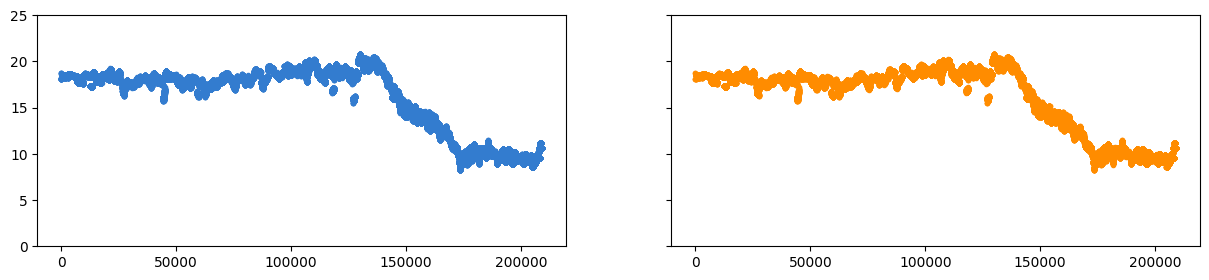

In [33]:

fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,3))

# ax.yaxis.tick_right()
# ax2.yaxis.tick_right()
rntiModeGrouped.get_group(('DL', 1))['SINR(dB)'].plot(style='.', color="#337CCF", ax=ax)
rntiModeGrouped.get_group(('UL', 1))['SINR(dB)'].plot(style='.', color='darkorange', ax=ax2)

ax.set_yticks([0, 5, 10, 15, 20, 25])
ax2.set_yticks([0, 5, 10, 15, 20, 25])



/tmp/ipykernel_19617/1535532701.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  ax = rntiGrouped.get_group(1)['SINR(dB)'].plot(style='.',color="#337CCF")


<Axes: >

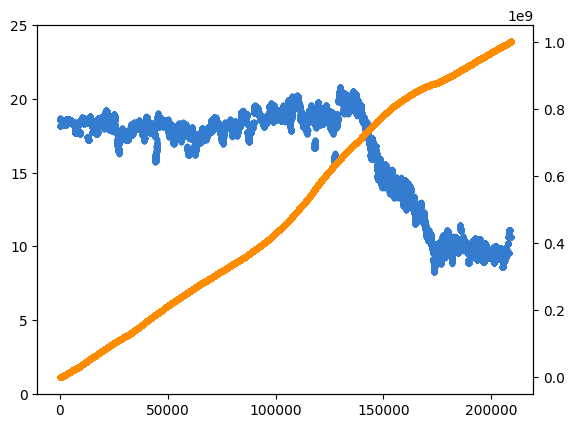

In [30]:
ax = rntiGrouped.get_group(1)['SINR(dB)'].plot(style='.',color="#337CCF")
ax.set_yticks([0, 5, 10, 15, 20, 25])
cwndDF_scenario['new_CWND'].plot(secondary_y=True, style='.', color="darkorange")

<Axes: >

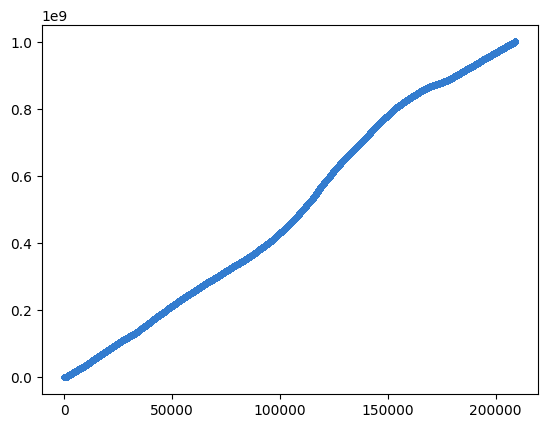

In [31]:
cwndDF_scenario['new_CWND'].plot(style='.', color="#337CCF")